<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span><ul class="toc-item"><li><span><a href="#функция-для-создания-пользовательских-профилей" data-toc-modified-id="функция-для-создания-пользовательских-профилей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>функция для создания пользовательских профилей</a></span></li><li><span><a href="#функция-для-расчёта-удержания" data-toc-modified-id="функция-для-расчёта-удержания-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>функция для расчёта удержания</a></span></li><li><span><a href="#функция-для-расчёта-конверсии" data-toc-modified-id="функция-для-расчёта-конверсии-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>функция для расчёта конверсии</a></span></li><li><span><a href="#функция-для-расчёта-LTV-и-ROI" data-toc-modified-id="функция-для-расчёта-LTV-и-ROI-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>функция для расчёта LTV и ROI</a></span></li><li><span><a href="#функция-для-сглаживания-фрейма" data-toc-modified-id="функция-для-сглаживания-фрейма-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>функция для сглаживания фрейма</a></span></li><li><span><a href="#функция-для-визуализации-удержания" data-toc-modified-id="функция-для-визуализации-удержания-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>функция для визуализации удержания</a></span></li><li><span><a href="#функция-для-визуализации-конверсии" data-toc-modified-id="функция-для-визуализации-конверсии-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>функция для визуализации конверсии</a></span></li><li><span><a href="#функция-для-визуализации-LTV-и-ROI" data-toc-modified-id="функция-для-визуализации-LTV-и-ROI-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>функция для визуализации LTV и ROI</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оцените-окупаемость-рекламы" data-toc-modified-id="Оцените-окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оцените окупаемость рекламы</a></span></li><li><span><a href="#Напишите-выводы" data-toc-modified-id="Напишите-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Напишите выводы</a></span></li></ul></div>

<div style="border:solid green 2px; padding: 20px">

Задачи проекта: 
- понять причину убытков компании Procrastinate Pro+;
- дать рекомендации по выходу компании "в плюс"
    
Необходимо определить: 
- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов;
    
Описание датасетов:
    
Таблица visits_info_short.csv хранит лог сервера с информацией о посещениях сайта.
    
- `User Id ` — уникальный идентификатор пользователя;
- `Region` — страна пользователя;
- `Device` — тип устройства пользователя;
- `Channel` — идентификатор источника перехода;
- `Session Start` — дата и время начала сессии;
- `Session End ` — дата и время окончания сессии;
    
Таблица orders_info_short.csv содержит информацию о заказах.
- `User Id  — уникальный идентификатор пользователя;
- `Event Dt` — дата и время покупки;
- `Revenue` — сумма заказа;
    
Таблица costs_info_short.csv содержит информацию о расходах на рекламу.
- `dt` — дата проведения рекламной кампании;
- `Channel` — идентификатор рекламного источника;
- `Costs ` — расходы на эту кампанию;    

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import datetime
from datetime import date, datetime, timedelta

#### Знакомство с данными

In [2]:
#загрузка visits_info_short.csv
try:
    visits_info = pd.read_csv(r'C:\Users\79163\data_analasys\Marketing\visits_info_short.csv')
except:
    visits_info = pd.read_csv('/datasets/visits_info_short.csv')

In [3]:
# просмотр датасета
visits_info

User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [4]:
# изучение датасета
visits_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Вывод:
- нужно изменить тип данных в столбцах Session Start, Session End
- переименовать Session Start, Session End, User Id => Session_Start, Session_End, User_Id

In [5]:
#загрузка orders_info_short.csv
try:
    orders_info = pd.read_csv(r'C:\Users\79163\data_analasys\Marketing\orders_info_short.csv')
except:
    orders_info = pd.read_csv('/datasets/orders_info_short.csv')

In [6]:
# просмотр датасета
orders_info

User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

In [7]:
# изучение датасета
orders_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Вывод:
- нужно изменить тип данных в столбце Event Dt
- переименовать Event Dt, User Id => Event_Dt, User_Id

In [8]:
#загрузка costs_info_short.csv
try:
    costs_info = pd.read_csv(r'C:\Users\79163\data_analasys\Marketing\costs_info_short.csv')
except:
    costs_info = pd.read_csv('/datasets/costs_info_short.csv')

In [9]:
# просмотр датасета
costs_info

dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

In [10]:
# изучение датасета
costs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Вывод:
- нужно изменить тип данных в столбце dt

##### Предобработка данных

In [11]:
# преобразуем данные о времени в каждом датасете
visits_info['Session Start'] = pd.to_datetime(visits_info['Session Start'])
visits_info['Session End'] = pd.to_datetime(visits_info['Session End'])
orders_info['Event Dt'] = pd.to_datetime(orders_info['Event Dt'])
costs_info['dt'] = pd.to_datetime(costs_info['dt'])

In [12]:
# переименуем столбы в соответствии со стилем "змейка" + приведем к нижнему регистру 
#(ради единообразия и чтобы сразу выделять все название в 1 клик)
visits_info.columns = [col.replace(' ', '_').lower() for col in visits_info.columns]

In [13]:
# переименуем столбы в соответствии со стилем "змейка" + приведем к нижнему регистру 
#(ради единообразия и чтобы сразу выделять все название в 1 клик)
orders_info.columns = [col.replace(' ', '_').lower() for col in orders_info.columns]

In [14]:
# переименуем столбы (приведем к нижнему регистру) ради единообразия и чтобы сразу выделять все название в 1 клик
costs_info.rename(columns = {'Channel':'channel'}, inplace = True )

In [15]:
#проверка visits_info
visits_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [16]:
#проверим кол-во в каждой колонке (на всякий случай)
visits_info.isnull().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [17]:
#проверка orders_info
orders_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [18]:
#проверим кол-во в каждой колонке (на всякий случай)
orders_info.isnull().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [19]:
#проверка costs_info
costs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [20]:
#проверим кол-во в каждой колонке (на всякий случай)
costs_info.isnull().sum()

dt         0
channel    0
costs      0
dtype: int64

Вывод: пропусков/NAN значений не обнаружено; типы данных скорректированы

In [21]:
#проверка на дубликаты visits_info
duplicate_visits_info = visits_info.duplicated().sum()
print('Количество дубликатов в датасете visits_info:', duplicate_visits_info)

Количество дубликатов в датасете visits_info: 0


In [22]:
#проверка на дубликаты visits_info
duplicate_orders_info = orders_info.duplicated().sum()
print('Количество дубликатов в датасете orders_info:', duplicate_orders_info)

Количество дубликатов в датасете orders_info: 0


In [23]:
#проверка на дубликаты costs_info
duplicate_costs_info = costs_info.duplicated().sum()
print('Количество дубликатов в датасете costs_info:', duplicate_costs_info)

Количество дубликатов в датасете costs_info: 0


#### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [24]:
# определим момент анализа исходя из даты, которая дана в самом задании (шаг 5)
observation_date = datetime(2019, 11, 1).date()
# горизонт анализа определен в самом задании (шаг 5 "не позднее чем через 2 недели после привлечения")
horizon_days = 14 

##### функция для создания пользовательских профилей

In [25]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### функция для расчёта удержания

In [26]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### функция для расчёта конверсии

In [27]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### функция для расчёта LTV и ROI

In [28]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

##### функция для сглаживания фрейма

In [29]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### функция для визуализации удержания

In [30]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### функция для визуализации конверсии

In [31]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### функция для визуализации LTV и ROI

In [32]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [33]:
#Получим профили пользователей
profiles = get_profiles(visits_info, orders_info, costs_info)
#profiles = get_profiles(visits, orders, events, costs)
display(profiles.head(5)) 

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769

In [34]:
#Определим минимальную и максимальную даты привлечения пользователей
min_analysis_date = costs_info['dt'].min()
print('Минимальная дата привлечения пользователей:', min_analysis_date)
man_analysis_date =  costs_info['dt'].max()
print('Максимальная дата привлечения пользователей:', man_analysis_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей: 2019-10-27 00:00:00


#### Исследовательский анализ данных

In [35]:
#определим из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей
#для этого объеденим visits_info и orders_info
visits_and_order_info = orders_info.merge(visits_info, on = 'user_id', how = 'left').fillna(0)
visits_and_order_info

user_id            event_dt  revenue         region   device  \
0       188246423999 2019-05-01 23:09:52     4.99  United States  Android   
1       174361394180 2019-05-01 12:24:04     4.99  United States   iPhone   
2       174361394180 2019-05-01 12:24:04     4.99  United States   iPhone   
3       174361394180 2019-05-01 12:24:04     4.99  United States   iPhone   
4       174361394180 2019-05-01 12:24:04     4.99  United States   iPhone   
...              ...                 ...      ...            ...      ...   
609949  329994900775 2019-10-31 13:29:06     4.99             UK       PC   
609950  329994900775 2019-10-31 13:29:06     4.99             UK       PC   
609951  329994900775 2019-10-31 13:29:06     4.99             UK       PC   
609952  329994900775 2019-10-31 13:29:06     4.99             UK       PC   
609953  329994900775 2019-10-31 13:29:06     4.99             UK       PC   

               channel       session_start         session_end  
0             FaceBoom 2019-05-01 23:09:42 2019-05-01 23:21:06  
1       RocketSuperAds 2019-05-01 12:23:47 2019-05-01 12:47:02  
2       RocketSuperAds 2019-05-02 12:22:28 2019-05-02 12:43:38  
3       RocketSuperAds 2019-05-03 09:41:58 2019-05-03 09:52:16  
4       RocketSuperAds 2019-05-05 01:37:05 2019-05-05 01:38:31  
...                ...                 ...                 ...  
609949         LeapBob 2019-10-27 18:17:40 2019-10-27 18:18:45  
609950         LeapBob 2019-10-28 06:41:26 2019-10-28 06:59:29  
609951         LeapBob 2019-10-29 16:39:32 2019-10-29 17:31:59  
609952         LeapBob 2019-10-30 01:53:52 2019-10-30 02:15:46  
609953         LeapBob 2019-10-31 13:28:12 2019-10-31 14:39:29  

[609954 rows x 8 columns]

In [36]:
# проверка пользователей из объедененного датасета visits_and_order_info
visits_and_order_info.groupby('user_id')['event_dt'].nunique()

user_id
599326           3
46006712         1
374052872        8
414791703       10
785077127       11
                ..
999625937544     3
999645428220     7
999659859721     4
999779032958     6
999895427370     1
Name: event_dt, Length: 8881, dtype: int64

Вывод: в новом датасете уникальных пользователей 8 881 из общего количества 609 954.

In [37]:
#визуализация географического распределения пользователей 
#создание вспомогательного датасета
a = pd.pivot_table(visits_and_order_info,
               index = ['region'],
               values = ['user_id'],
               aggfunc= 'count').reset_index().sort_values('user_id')

# строим столбчатую диаграмму 
fig = px.bar(a, # загружаем данные 
             x = 'user_id', # указываем столбец с данными для оси X
             y = 'region', # указываем столбец с данными для оси Y
             text = 'user_id' # добавляем аргумент, который отобразит текст с информацией о количестве                             
            )
# оформляем график
fig.update_layout(title = 'Географического распределения пользователей',
                   xaxis_title = 'Количество пользователей',
                   yaxis_title = 'Названия стран') #так как очевидно, что по оси указаны категории, то нет смысла подписывать и утяжелять график
fig.show() # выводим график

Вывод: больше всего пользователей из США (406 915), далее Великобритания (76 185), Франция (65 697) и Германия (61 157)

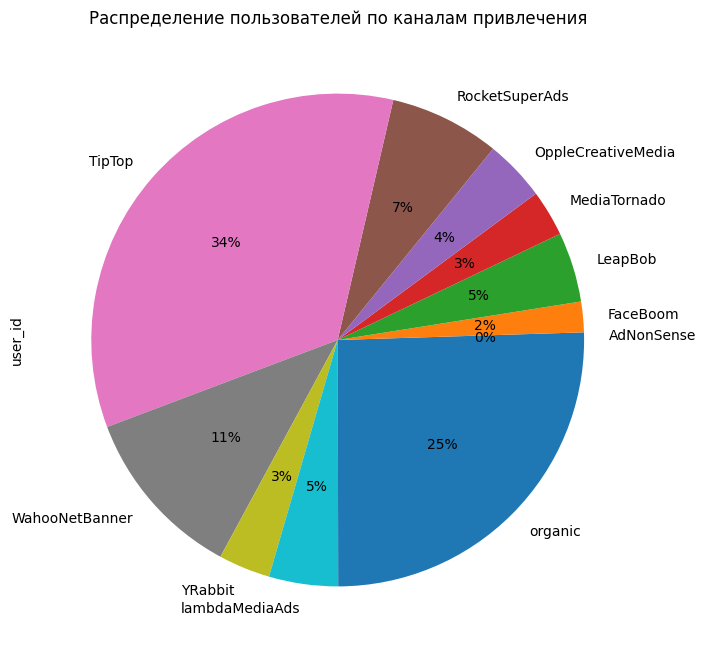

In [38]:
# посмотрим распределение пользователей по каналам привлечения
plt.figure(figsize=(15, 8))
visits_and_order_info.groupby('channel')['user_id'].count().plot(kind='pie', autopct='%1.0f%%')
plt.title('Распределение пользователей по каналам привлечения');

In [39]:
#определим на какую страну приходится больше всего платящих пользователей (самая крупная сумма заказа = revenue)
pd.pivot_table(visits_and_order_info,
               index = ['region'],
               values = ['revenue'],
               aggfunc= [ np.sum]).reset_index().sort_values(('sum', 'revenue'), ascending = False)\
               .style.background_gradient(axis=None)

Вывод: самая большая сумма заказов США (2 179 475.85), далее Великобритания (421 292.15), Франция (353 437.03) и Германия (323 205.43)

In [40]:
#определим на какую страну приходится больше всего платящих пользователей по датасету profiles
# для этого создадим вспомогательный датасет по географическому распределению пользователей по датасету profiles
df = profiles.groupby('region')['user_id'].count().sort_values(ascending = False)
pd.DataFrame(df).reset_index()

#создадим вспомогательный датасет с количеством платящих пользователей ('payer' = True)
payer_loc = profiles.loc[profiles['payer'] == True].groupby('region')['user_id'].count().sort_values(ascending = False)
pd.DataFrame(payer_loc).reset_index()

# объеденим вспомогательные датасеты и создадим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
users_quantity = pd.concat([df, payer_loc], axis=1).reset_index()
# переименуем столбцы
users_quantity.columns = ['region', 'total_users', 'payer_user']
# добавим столбец со значением доли платящих
users_quantity['users_proportion'] = (users_quantity['payer_user']/users_quantity['total_users'])*100
users_quantity.sort_values(by = 'users_proportion', ascending = False).style.background_gradient(axis=None)

Вывод: Географически больше пользователей (по датасету profiles) находятся в США - 100 002 (из них платящих 6 902); Великобритания - 17 575 (из них платящих 700); Франция - 17 450 (из них платящих 663); Германия - 14 981 (из них платящих 616);

In [41]:
#определим какими устройствами пользуются клиенты
#создадим вспомогательный датасет
b = profiles['device'].value_counts()
pd.DataFrame(b).reset_index()

#определим какие устройства предпочитают платящие пользователи
#создадим вспомогательный датасет
device_loc = profiles.loc[profiles['payer'] == True].groupby('device')['user_id'].count().sort_values(ascending = False)
pd.DataFrame(device_loc).reset_index()

# объеденим вспомогательные датасеты и создадим таблицу, отражающую количество пользователей 
#и долю платящих для каждого устройства.
device_quantity = pd.concat([b, device_loc], axis=1).reset_index()
# переименуем столбцы
device_quantity.columns = ['device', 'total_device', 'payer_user']
# добавим столбец со значением доли платящих
device_quantity['device_proportion'] = (device_quantity['payer_user']/device_quantity['total_device'])*100
#добавим красоты и укажем процент в самой таблице
device_quantity.sort_values(by = 'device_proportion', ascending = False).style.format({'device_proportion': '{:.1f}%'})


Вывод: Распределение пользователей по устройствам (по датасету profiles): iPhone - 54 479 (из них платящих 3 382); Android - 35 032 (из них платящих 2 050); Mac - 30 455 (из них платящих 1 912); РС - 30 042 (из них платящих 1 537);

In [42]:
#изучим рекламные источники привлечения 
#создадим вспомогательный датасет
c = profiles['channel'].value_counts()
pd.DataFrame(c).reset_index()

#определим каналы, из которых пришло больше всего платящих пользователей
#создадим вспомогательный датасет
channel_loc = profiles.loc[profiles['payer'] == True].groupby('channel')['user_id'].count().sort_values(ascending = False)
pd.DataFrame(channel_loc).reset_index()

#Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
# объеденим вспомогательные датасеты и создадим таблицу
channel_quantity = pd.concat([c, channel_loc], axis=1).reset_index()
# переименуем столбцы
channel_quantity.columns = ['channel', 'total_users', 'payer_user']
#добавим столбец со значением доли платящих для каждого канала привлечения
channel_quantity['channel_proportion'] = (channel_quantity['payer_user']/channel_quantity['total_users'])*100
#добавим красоты и укажем процент в самой таблице
channel_quantity.sort_values(by = 'channel_proportion', ascending = False).style.format({'channel_proportion': '{:.1f}%'})


Вывод: определено 11 рекламных источников, самый высокий % конверсии у канала FaceBoom (12,2%).

#### Маркетинг

In [43]:
# посчитаем общую сумму расходов на маркетинг
costs_info['costs'].sum().round()

105497.0

In [44]:
# посмотрим распределение маркетинговых затрат по каналам привелчения
costs_info.groupby('channel').sum().sort_values(by = 'costs', ascending = False).style.background_gradient(axis=None)

In [45]:
# строим таблицу по распределению маркетинговых затрат по каналам привелчения и доле 
costs_share_of_total_costs = costs_info.groupby('channel').sum().sort_values(by = 'costs', ascending = False).reset_index()
costs_share_of_total_costs['costs_share'] = (costs_share_of_total_costs['costs'] / costs_info['costs'].sum()*100)
display(costs_share_of_total_costs)

channel     costs  costs_share
0              TipTop  54751.30    51.898295
1            FaceBoom  32445.60    30.754910
2      WahooNetBanner   5151.00     4.882589
3          AdNonSense   3911.25     3.707441
4  OppleCreativeMedia   2151.25     2.039152
5      RocketSuperAds   1833.00     1.737485
6             LeapBob   1797.60     1.703930
7      lambdaMediaAds   1557.60     1.476436
8        MediaTornado    954.48     0.904744
9             YRabbit    944.22     0.895018

Вывод: суммарные расходы на маркетинг составили 105 497. Из них больше всего ушло на канал TipTop (54 751.30)

In [46]:
# создадим в датафрейме costs_info дополнительные столбцы с номерами недели и месяцем
costs_info['week'] = costs_info['dt'].dt.isocalendar().week
costs_info['month'] = costs_info['dt'].dt.month

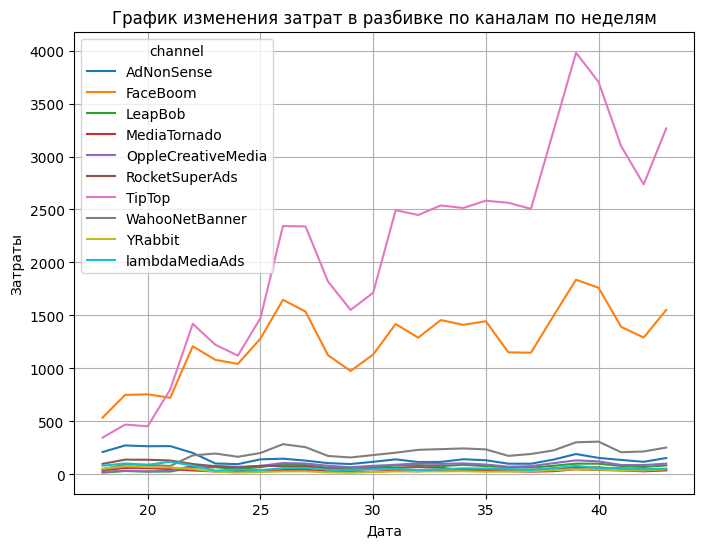

In [47]:
# визуализациюя динамики изменения расходов во времени (по неделям) по каждому источнику. 

costs_info.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(figsize=(8, 6),
                                                                                            grid=True,)

plt.title('График изменения затрат в разбивке по каналам по неделям')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

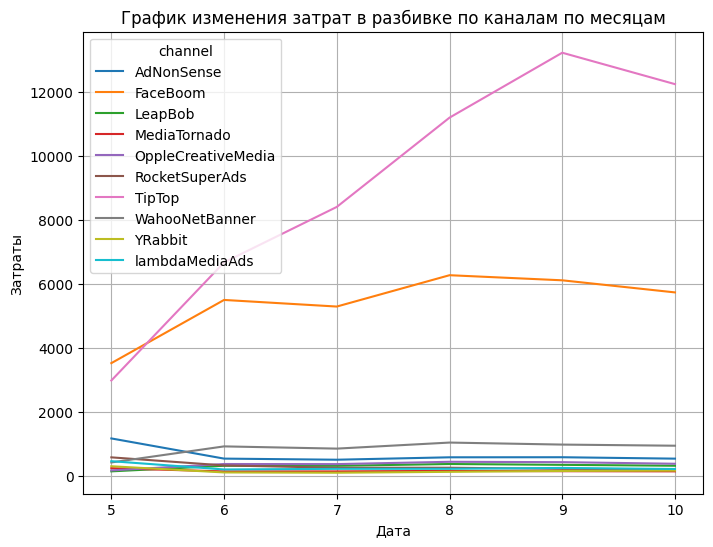

In [48]:
# визуализациюя динамики изменения расходов во времени (по месяцам) по каждому источнику. 

costs_info.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(figsize=(8, 6),
                                                                                             grid=True,)

plt.title('График изменения затрат в разбивке по каналам по месяцам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Вывод: видно, что затраты на маркетинг со временем возрастали только на двух каналах: TipTop и FaceBoom

In [49]:
# сколько, в среднем, стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.
# столбец acquisition_cost (CAC) = рекламные расходы / привлечённых пользователей
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending = False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

Вывод: Топ-3 самых дорогих, в среднем, по привлечению 1 пользователя явл. каналы (в порядке убывания):TipTop (2.79), FaceBoom (1.11), AdNonSense (1.00)

count    93569.000000
mean         1.127481
std          0.990503
min          0.124615
25%          0.257143
50%          1.080531
75%          1.128571
max          3.715385
Name: acquisition_cost, dtype: float64

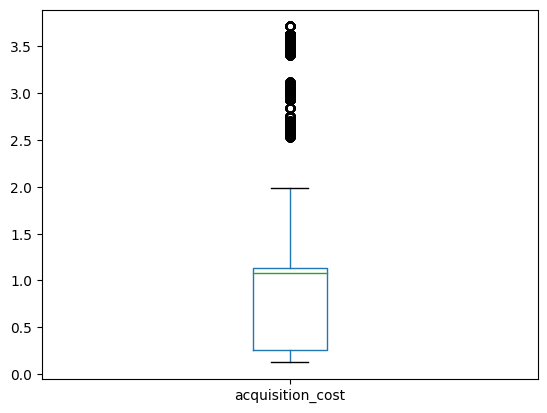

In [50]:
# исключаем из расчета органических пользователей, так как они "бесплатны"
non_org = profiles.query('channel != "organic"').groupby('user_id')['acquisition_cost'].mean()

# выводим статистические данные
display(non_org.describe())

# строим диаграмму размаха
non_org.plot(kind = 'box')
plt.show()

Вывод: 
- Значения CAC находятся в диапазоне от 0.13 до 3,72 долларов.
- 75% значений сосредоточены в интервале до 1,13 доллара.
- Среднее значение САС (в какую сумму компании обходится каждый новый клиент): 1,12-1,13 доллара

In [51]:
# Оценим MAU, WAU и DAU, которые  позволяют анализировать активность пользователей приложения
# и своевременно реагировать на их поведение.
# для этого добавляем в таблицу visits_info колонки session_date, session_week, session_month

visits_info['session_date'] = visits_info['session_start'].dt.date
visits_info['session_week'] = visits_info['session_start'].dt.isocalendar().week
visits_info['session_month'] = visits_info['session_start'].dt.month

display(visits_info.sort_values(by='session_month').head(5))

user_id         region  device         channel  \
0       981449118918  United States  iPhone         organic   
222587  618628270635             UK  iPhone         LeapBob   
222586  631256661190        Germany      PC         organic   
222585  566958668876         France     Mac  WahooNetBanner   
222584  666830407247         France     Mac  WahooNetBanner   

             session_start         session_end session_date  session_week  \
0      2019-05-01 02:36:01 2019-05-01 02:45:01   2019-05-01            18   
222587 2019-05-31 00:53:47 2019-05-31 01:02:25   2019-05-31            22   
222586 2019-05-31 11:16:46 2019-05-31 11:18:28   2019-05-31            22   
222585 2019-05-31 02:24:53 2019-05-31 03:05:28   2019-05-31            22   
222584 2019-05-31 12:49:13 2019-05-31 14:31:41   2019-05-31            22   

        session_month  
0                   5  
222587              5  
222586              5  
222585              5  
222584              5

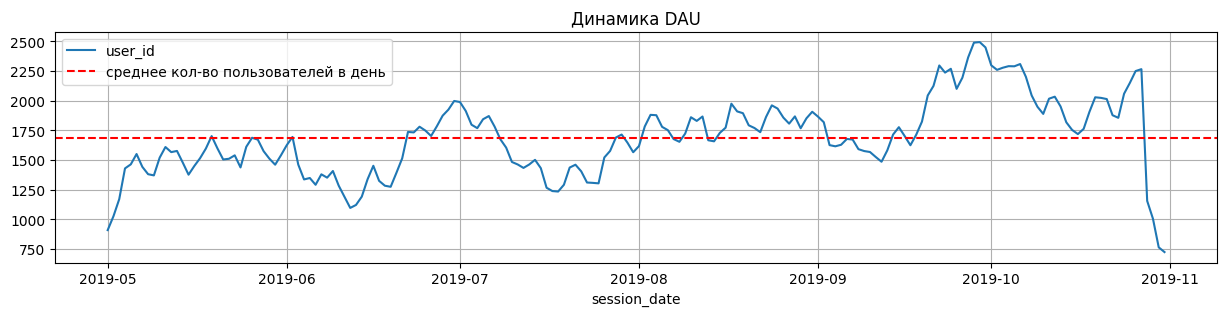

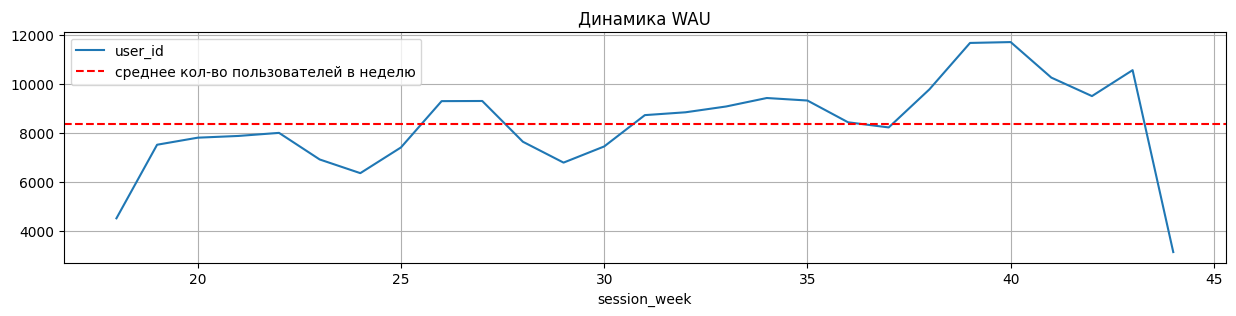

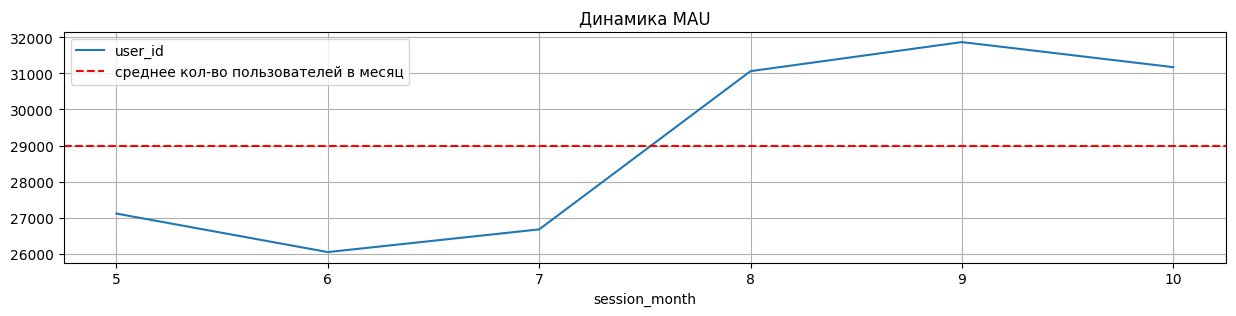

In [52]:
# строим графики изменения метрик DAU, WAU, MAU во времени

visits_info.groupby('session_date')['user_id'].nunique().plot(grid = True, title = 'Динамика DAU', figsize = (15,3))
plt.axhline(
    y = visits_info.groupby('session_date')['user_id'].nunique().mean(), color = 'red',
    linestyle = '--', label = 'среднее кол-во пользователей в день')
plt.legend()
plt.show()

visits_info.groupby('session_week')['user_id'].nunique().plot(grid = True, title ='Динамика WAU', figsize = (15,3))
plt.axhline(
    y = visits_info.groupby('session_week')['user_id'].nunique().mean(), color = 'red',
    linestyle = '--', label = 'среднее кол-во пользователей в неделю')
plt.legend()
plt.show()

visits_info.groupby('session_month')['user_id'].nunique().plot(grid = True, title = 'Динамика MAU', figsize = (15,3))
plt.axhline(
    y = visits_info.groupby('session_month')['user_id'].nunique().mean(), color = 'red',
    linestyle = '--', label = 'среднее кол-во пользователей в месяц')
plt.legend()
plt.show()

Выводы:
- Динамика DAU находится около среднего значения и резко снижается с конца сентября;
- Динамика WAU повторяет DAU (находится около среднего значения и резко снижается с конца сентября);
- Динамика MAU показывает значения ниже среднего с мая по июнь, далее начинается рост, который выходит на пик в сентябре и после начинает снижаться.

In [53]:
# объеденим visits_info и costs_info, чтобы было болше данных для анализа
visits_and_costs_info = orders_info.merge(visits_info, on = 'user_id', how = 'left').fillna(0)
visits_and_costs_info.head(5)

user_id            event_dt  revenue         region   device  \
0  188246423999 2019-05-01 23:09:52     4.99  United States  Android   
1  174361394180 2019-05-01 12:24:04     4.99  United States   iPhone   
2  174361394180 2019-05-01 12:24:04     4.99  United States   iPhone   
3  174361394180 2019-05-01 12:24:04     4.99  United States   iPhone   
4  174361394180 2019-05-01 12:24:04     4.99  United States   iPhone   

          channel       session_start         session_end session_date  \
0        FaceBoom 2019-05-01 23:09:42 2019-05-01 23:21:06   2019-05-01   
1  RocketSuperAds 2019-05-01 12:23:47 2019-05-01 12:47:02   2019-05-01   
2  RocketSuperAds 2019-05-02 12:22:28 2019-05-02 12:43:38   2019-05-02   
3  RocketSuperAds 2019-05-03 09:41:58 2019-05-03 09:52:16   2019-05-03   
4  RocketSuperAds 2019-05-05 01:37:05 2019-05-05 01:38:31   2019-05-05   

   session_week  session_month  
0            18              5  
1            18              5  
2            18              5  
3            18              5  
4            18              5

In [54]:
#посмотрим данные по источнику перехода
pd.pivot_table(visits_and_costs_info,
               index = ['channel'],
               columns=['device'],
               values = ['user_id'],
               aggfunc = 'count').sort_values(by = 'channel', ascending = False).style.background_gradient(axis=None)

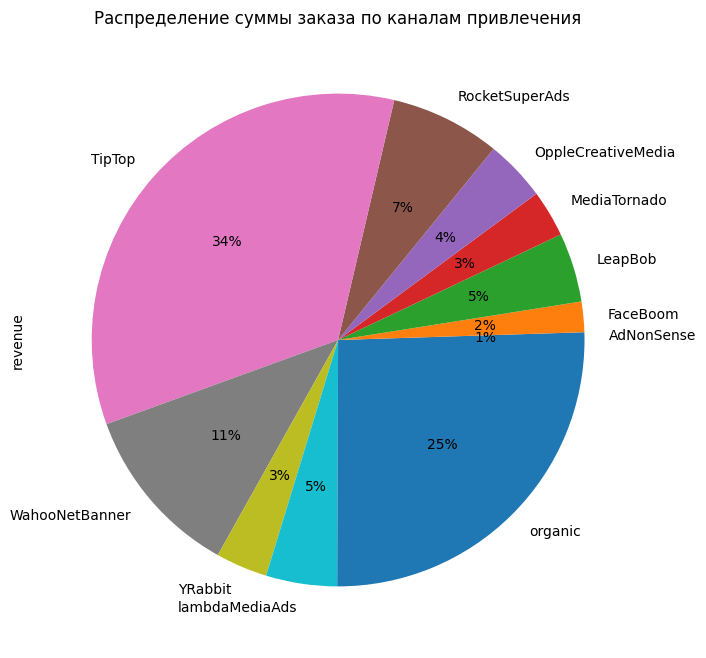

In [55]:
# посмотрим распределение суммы заказов по каналам привлечения
plt.figure(figsize=(15, 8))
visits_and_costs_info.groupby('channel')['revenue'].sum().plot(kind='pie', autopct='%1.0f%%')
plt.title('Распределение суммы заказа по каналам привлечения');

In [56]:
#посмотрим данные соотношение источников перехода и суммы заказа (revenue)
pd.pivot_table(visits_and_costs_info,
               index = ['channel'],
               values = ['revenue'],
               aggfunc = 'mean').sort_values(by = 'revenue', ascending = False).style.background_gradient(axis=None)

Выводы: 
- имеет смысл посмотреть внимательнее источник перехода organic, он в числе лидеров c учетом того, что это "пользователи, которые пришли сами" и на их привлечение не было затрачено средств;
- Top-3 по revenue lambdaMediaAds (5,52); AdNonSense (5,45); MediaTornadо (5,43)

<div style="border:solid green 2px; padding: 20px">

Общий вывод по шагам 1 - 4: 
1) проведены проверка на наличие пропусков в датасетах visits_info_short.csv, orders_info_short.csv, costs_info_short.csv (не обнаружено);
2) проведена проверка на наличие дубликатов в датасетах visits_info_short.csv, orders_info_short.csv, costs_info_short.csv (не обнаружено);  
3) заданы функции:
- `get_profiles()` — для создания профилей пользователей;
- `get_retention()` — для подсчёта Retention Rate;
- `get_conversion()` — для подсчёта конверсии;
- `get_ltv()` — для подсчёта LTV;
- `filter_data()` — для сглаживания данных;
- `plot_retention()` — для построения графика Retention Rate;
- `plot_conversion()` — для построения графика конверсии;
- `plot_ltv_roi` — для визуализации LTV и ROI.

4) определены минимальная дата привлечения пользователей: 2019-05-01 и максимальная дата привлечения пользователей: 2019-10-27
5) больше всего пользователей из США (406 915), далее Великобритания (76 185), Франция (65 697) и Германия (61 157). Самая большая сумма заказов США (2 179 475.85), далее Великобритания (421 292.15), Франция (353 437.03) и Германия (323 205.43)
6) Географически больше пользователей (по датасету profiles) находятся в США - 100 002 (из них платящих 6 902); Великобритания -  17 575 (из них платящих 700); Франция - 17 450 (из них платящих 663); Германия - 14 981 (из них платящих 616);
7) Распределение пользователей по устройствам (по датасету profiles): iPhone - 54 479 (из них платящих 3 382); Android -  35 032
 (из них платящих 2 050); Mac - 30 455 (из них платящих 1 912); РС - 30 042 (из них платящих 1 537);
8) определено 11 рекламных источников, самый прибыльный FaceBoom (12,2%);
9) суммарные расходы на маркетинг составили 105 497. Из них больше всего ушло на канал TipTop (54 751.30);
10) затраты на маркетинг со временем возрастали только на двух каналах: TipTop и FaceBoom;
11) Топ-3 самых дорогих, в среднем, по привлечению 1 пользователя явл. каналы (в порядке убывания):TipTop (2.79), FaceBoom (1.11), AdNonSense (1.00). При этом каналы TipTop, FaceBoom наименее окупают вложенные в них денежные средства. Вероятно нужна оптимизация рекламных компаний.
12) Метрика вовлеченности пользователей (DAU, WAU, MAU):
- Динамика DAU находится около среднего значения и резко снижается с конца сентября;
- Динамика WAU повторяет DAU (находится около среднего значения и резко снижается с конца сентября);
- Динамика MAU показывает значения ниже среднего с мая по июнь, далее начинается рост, который выходит на пик в сентябре и после начинает снижаться.

#### Оцените окупаемость рекламы

Исходное условие: 

Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.
Эти параметры были заданы ранее (строка 24 кода):
* observation_date = datetime(2019, 11, 1).date()
* horizon_days = 14 

In [57]:
# уберем "органику" из датасета
non_org_profiles = profiles.query('channel != "organic"')

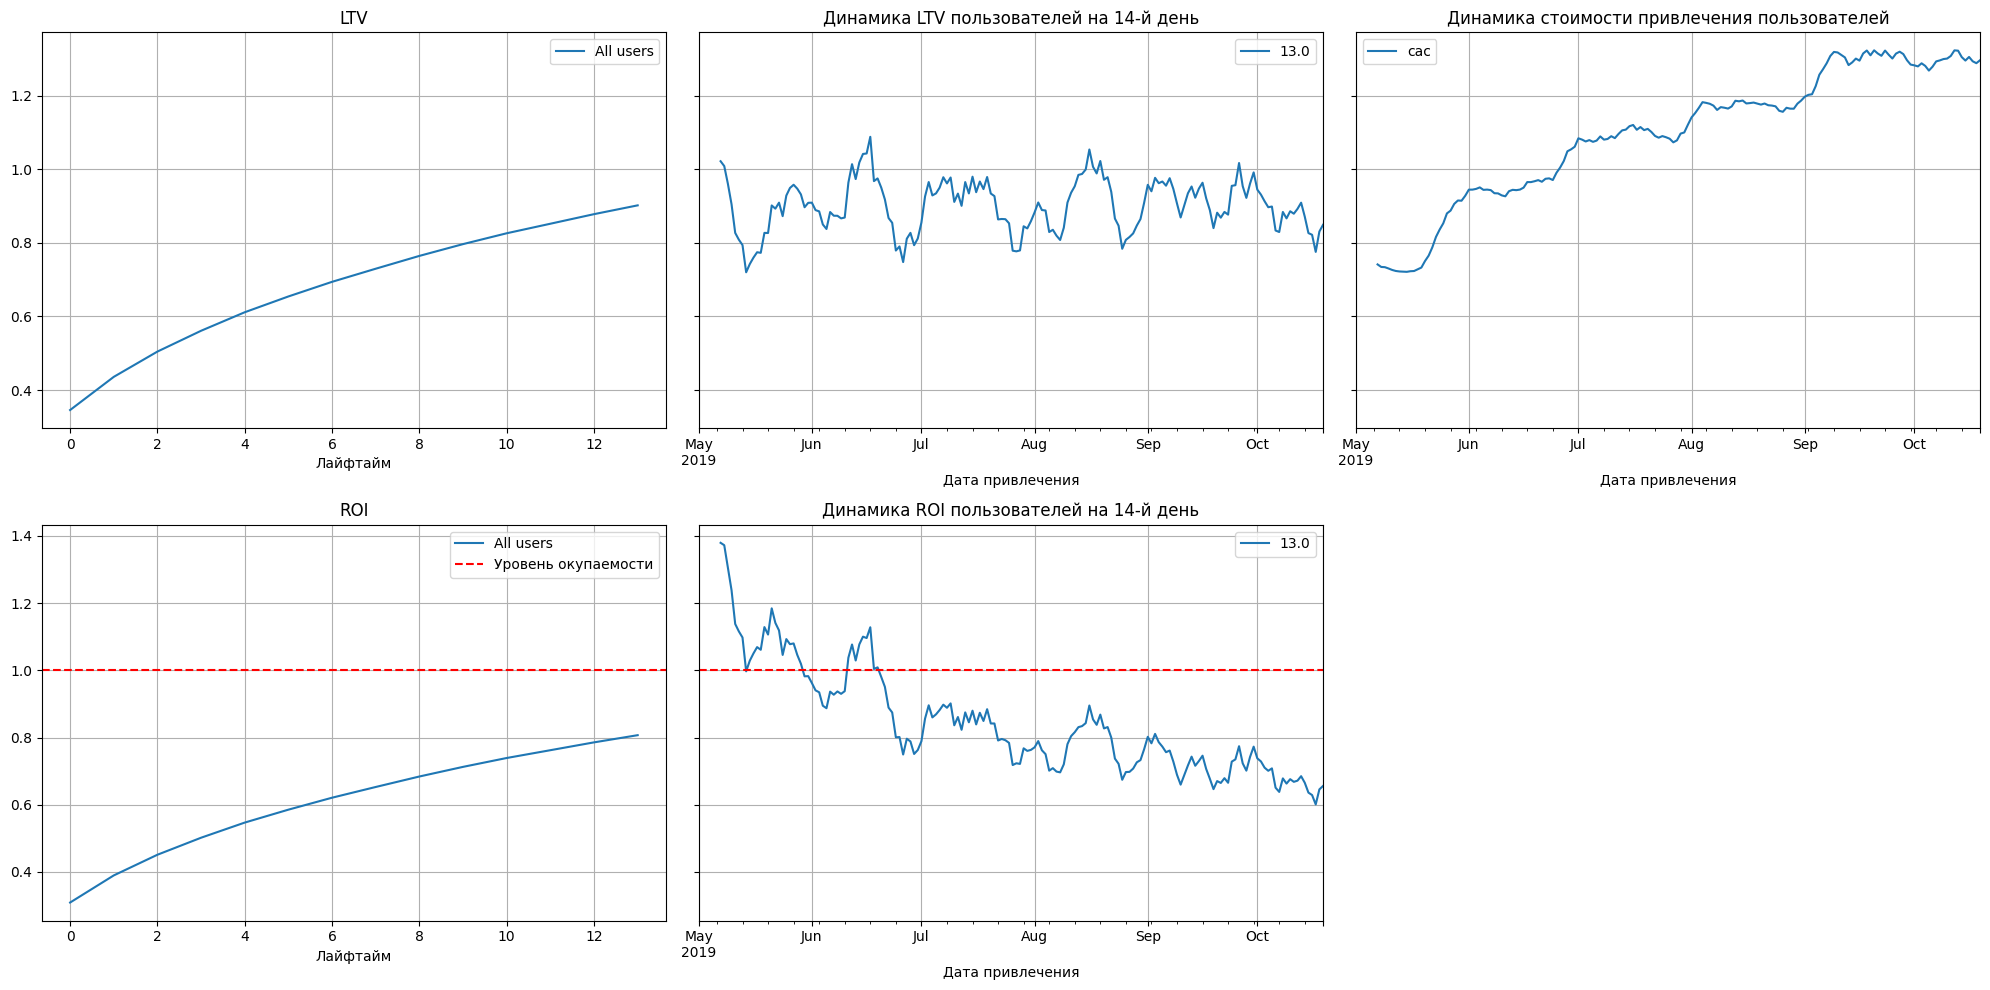

In [58]:
#посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi()
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    non_org_profiles, orders_info, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Выводы:
1) LTV относительно стабилен;
2) ROI 0,8 (пока компания окупает большую часть вложений, если ROI > 1, то вернется каждый инвестированный рубль и компания получит необходимую прибыль);
3) при этом динамика ROI пользователей на 14й-й день снижается, что вероятно связано с увеличением инвестиций на 2 канала продвижения начиная с июня (TipTop и FaceBoom). Увеличение САС (Стоимости привлечения клиента) также очевидно на графике

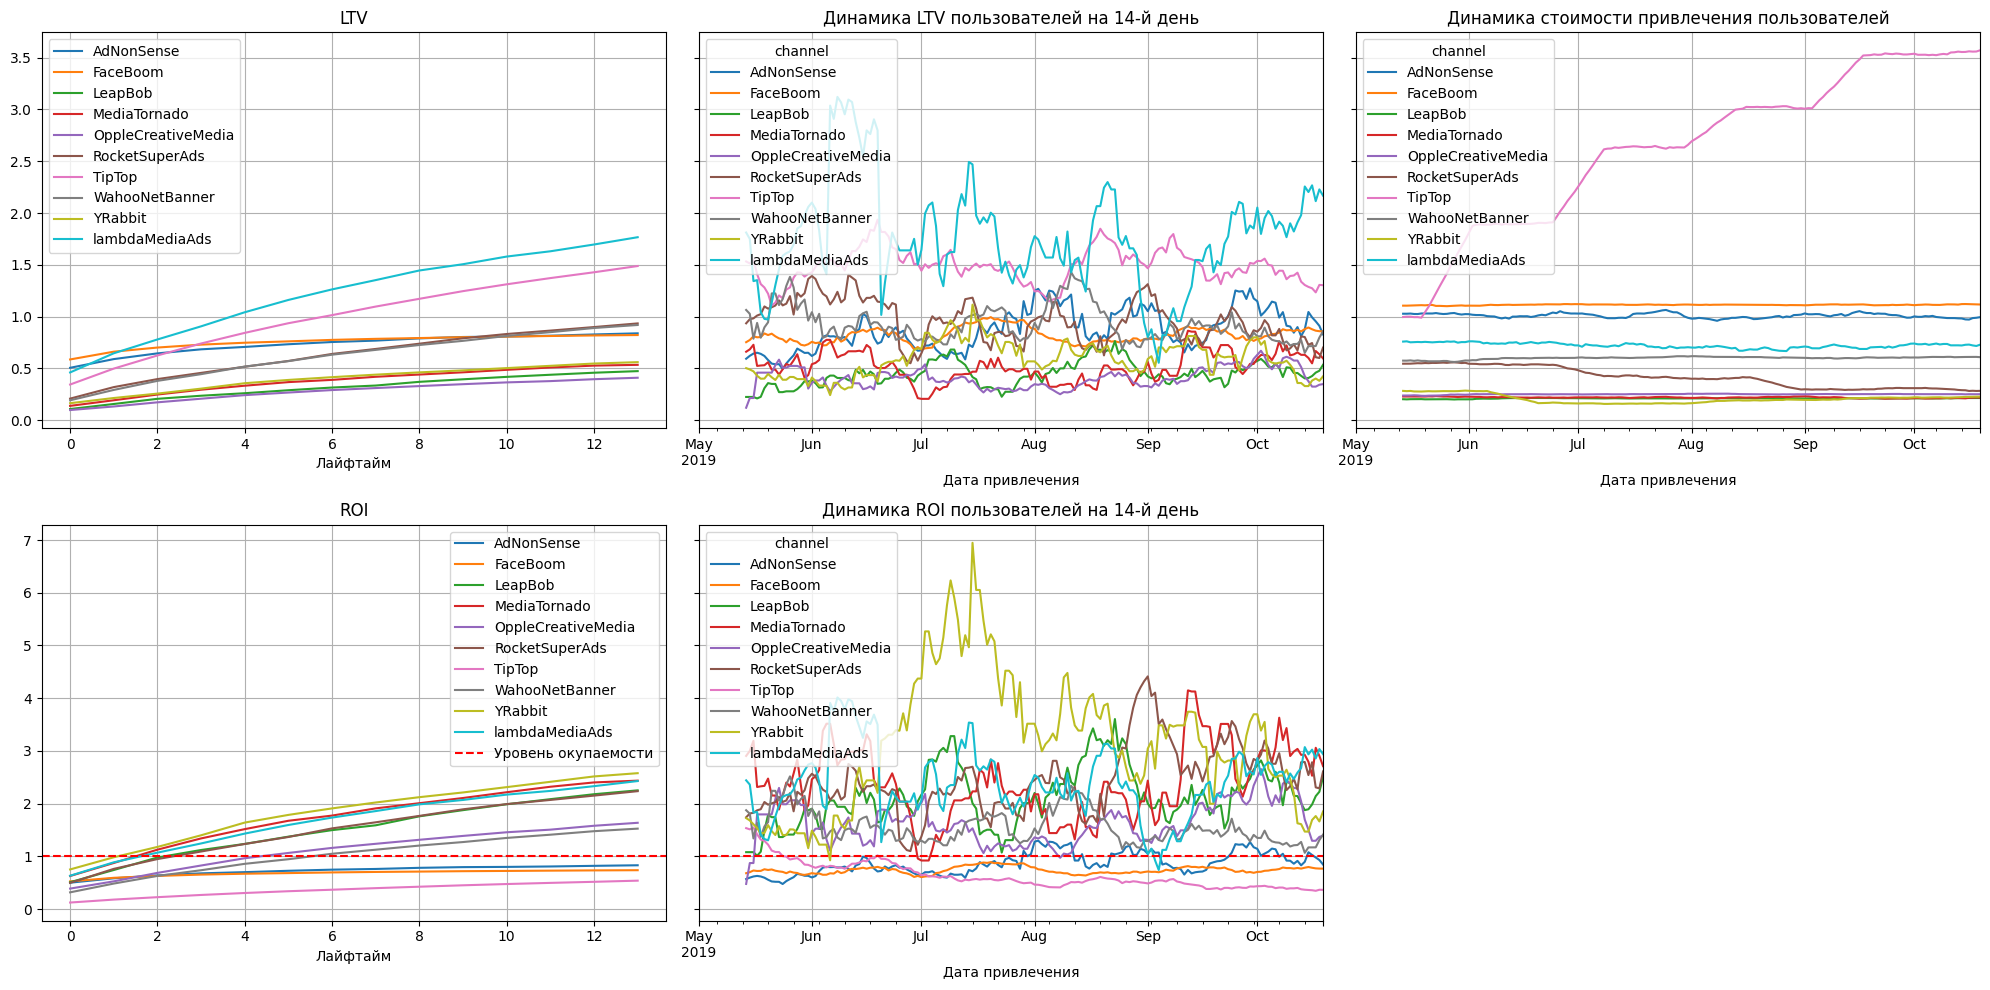

In [59]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    non_org_profiles, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Выводы:
1) Самая значимая динамика стоимости привлечения пользователей у канала TipTop. Остальные каналы имеют стабильную стоимость привлечения пользователей, за искл. RocketSuperAds (имеет небольшой тренд на снижение);
2) Наименее окупаются каналы: TipTop, FaceBoom, AdNonSense. Остальные каналы привлечения полностью окупают вложенные средства;
3) Наиболее значимые LTV (прибыль компании) и динамика LTV у канала lambdaMediaAds;
4) Наилучшая динамика ROI на 14й день у канала YRabbit.

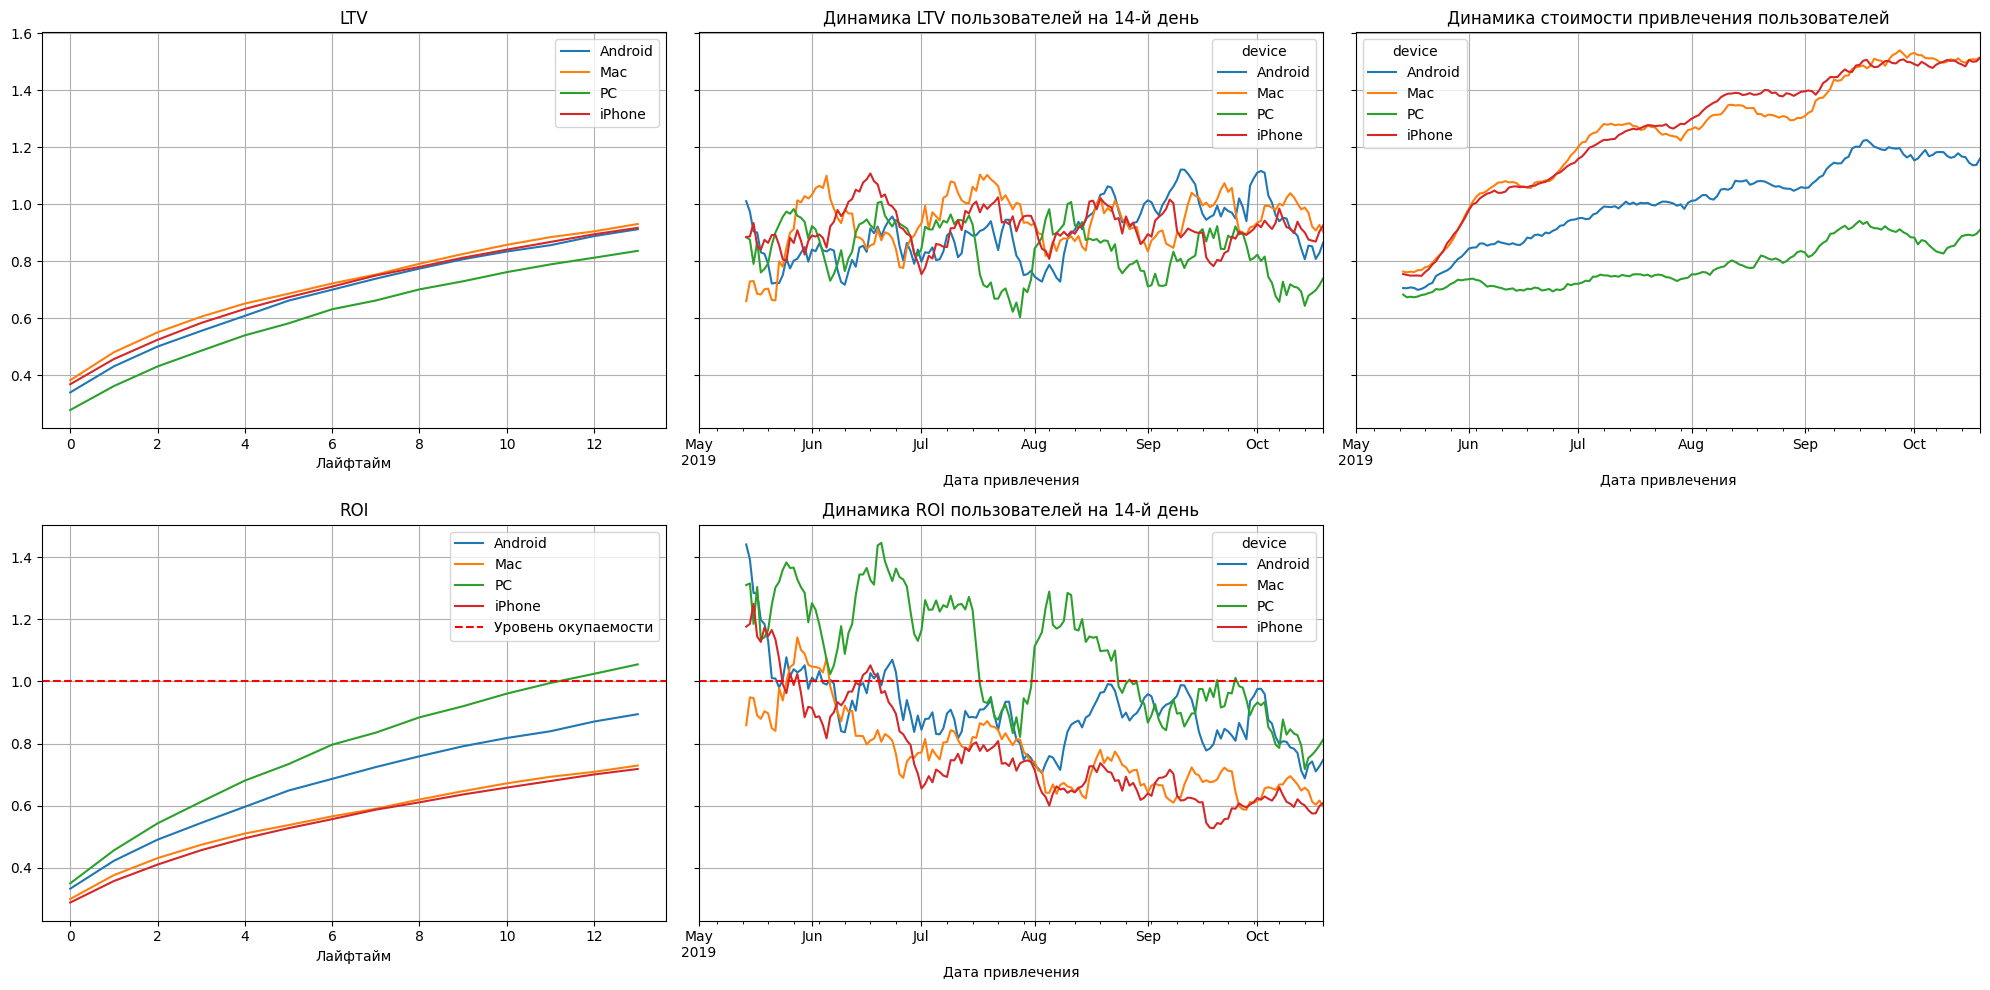

In [60]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    non_org_profiles, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Выводы:
1) LTV примерно одинаковый у всех 4х типов устройств;
2) Наиболее сильный тренд на рост стоимости привлечения пользователей у iPhone, Mac;
3) На показатель ROI > 1 выходит только PC, хотя в целом динамика ROI отрицательная.

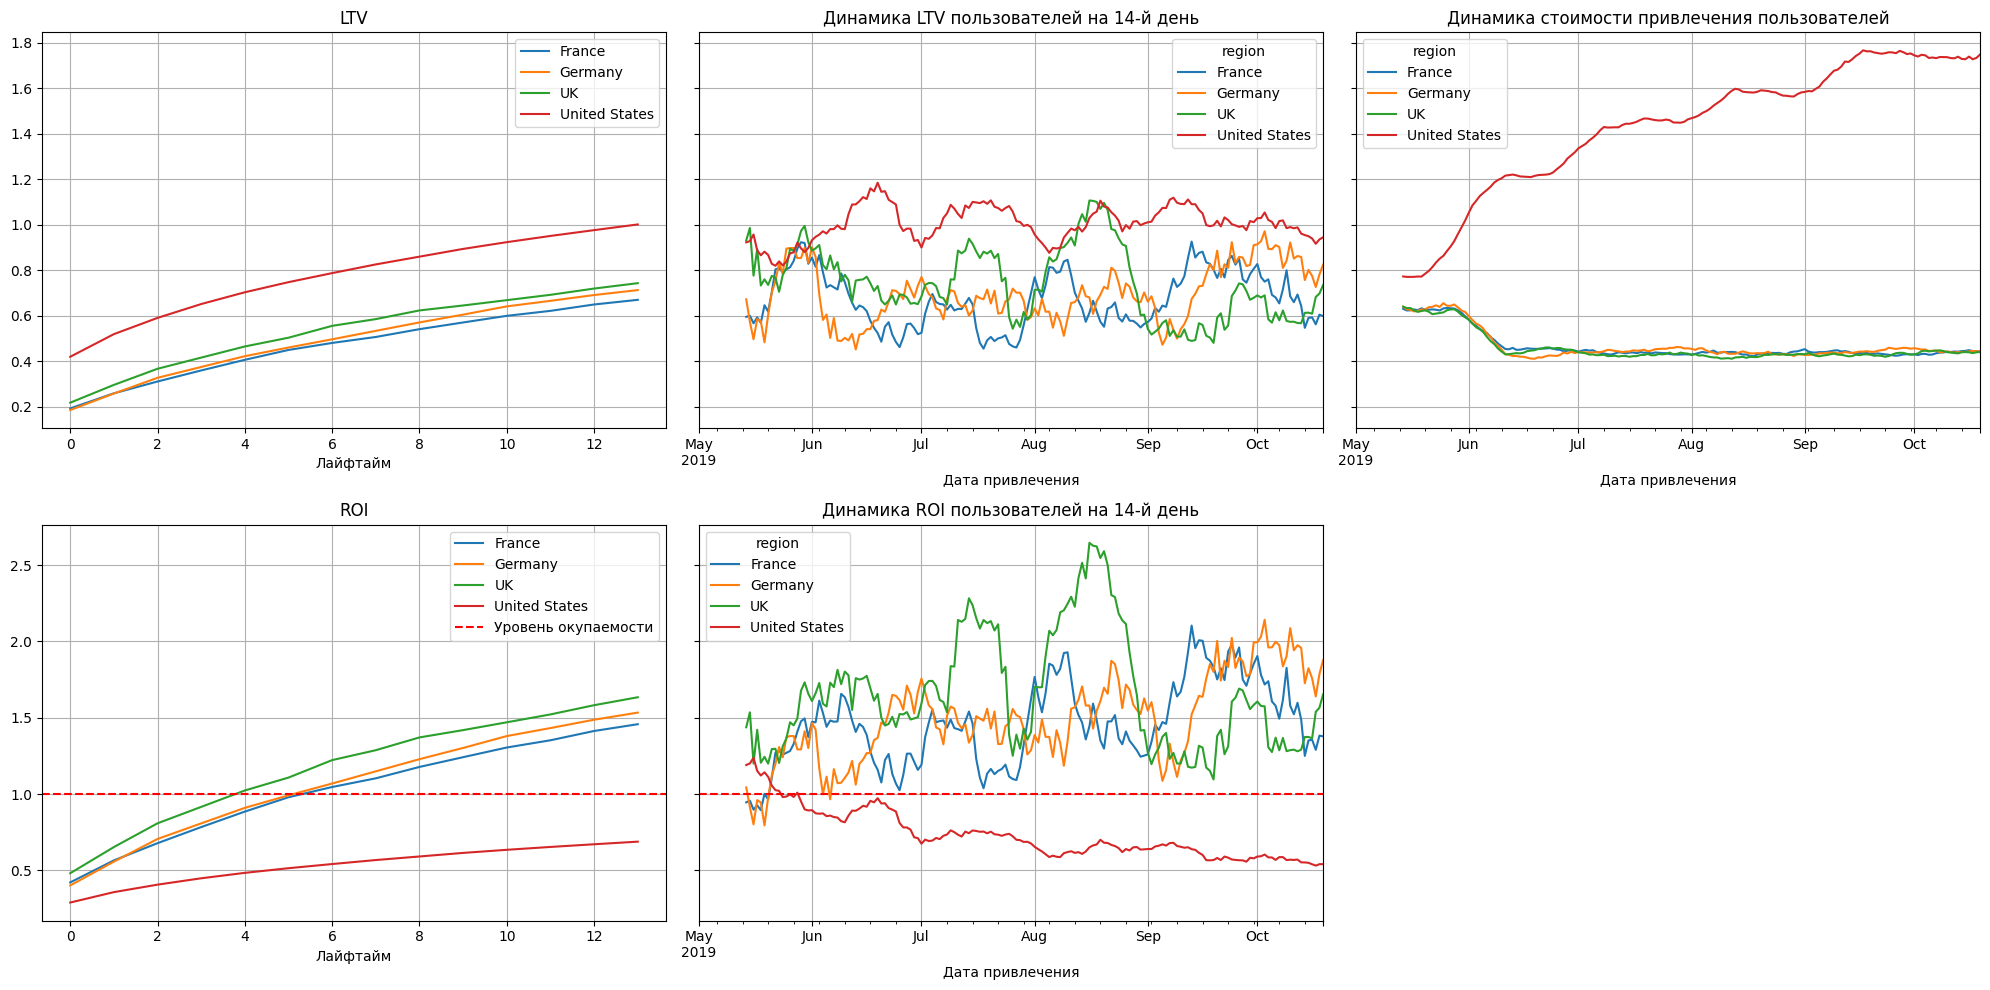

In [61]:
# смотрим окупаемость с разбивкой по регионам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    non_org_profiles, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод: 

1) Пользователи США перестали окупаться с июня, при этом затраты на привлечение пользователей именно из этого региона резго возрасли;
2) На показатель ROI > 1 выходят все регионы, кроме США. При этом динамика ROI у США тоже имеет тренд на снижение;
3) Только у США LTV выходят на 1, остальные регионы на отметке 0,8 (то есть инвестиции не окупаются).
4) Динамика стоимости привлечения пользователей у США имеет очень явный и сильный рост, в то время как у остальных регионов в июне спад и дальше стагнация.

In [62]:
#разбивка в привязках страна-устройство-канал
# создадим вспомогательный датасет исключительно по США
non_organic_visits = pd.pivot_table(visits_info.loc[visits_info['channel'] != 'organic'],
               index = ['region', 'device'],
               columns=['channel'],
               values = ['user_id'],
               aggfunc = 'count').sort_values(by = 'region', ascending = False).style.background_gradient(axis=None)
display(non_organic_visits)

Вывод: каналы распределены географически (не равномерно): 
1) США: TipTop, FaceBoom, MediaTornado, RocketSuperAds, YRabbit; В основном пользователи иcпользуют iPhone, Mac
2) Великобритания, Германия, Франция: AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner, lambdaMediaAds. В основном пользователи иcпользуют PC, Android

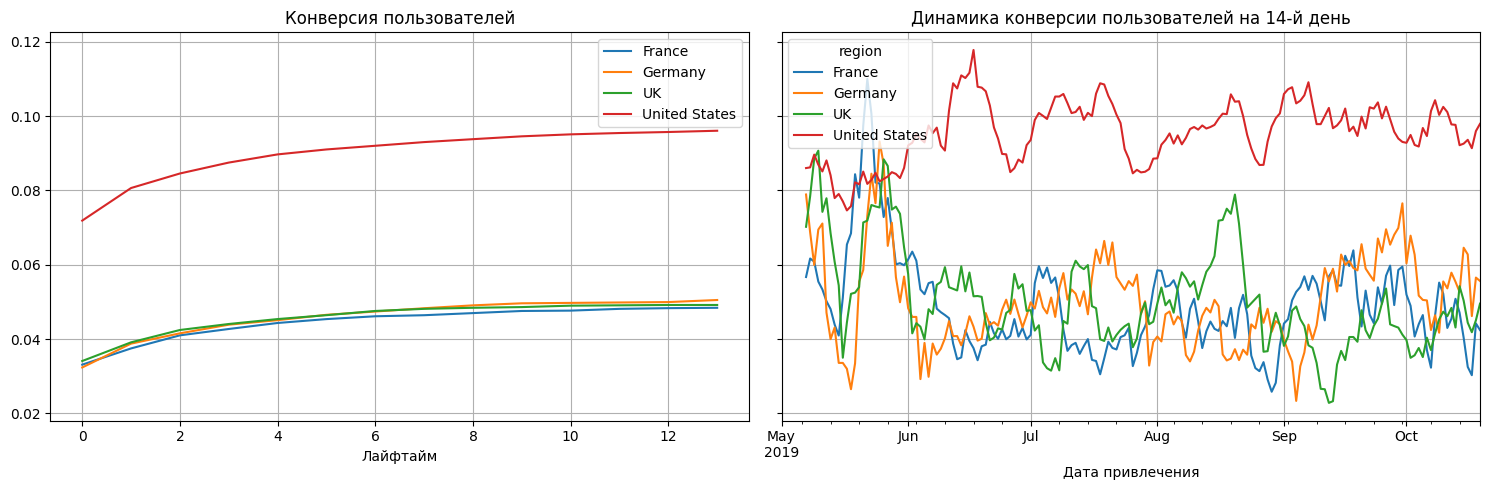

In [63]:
#Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion()
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    non_org_profiles, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Вывод: пользователи США "конвертируются" хорошо и постоянно...даже существенно лучше, чем пользователи из др.регионов

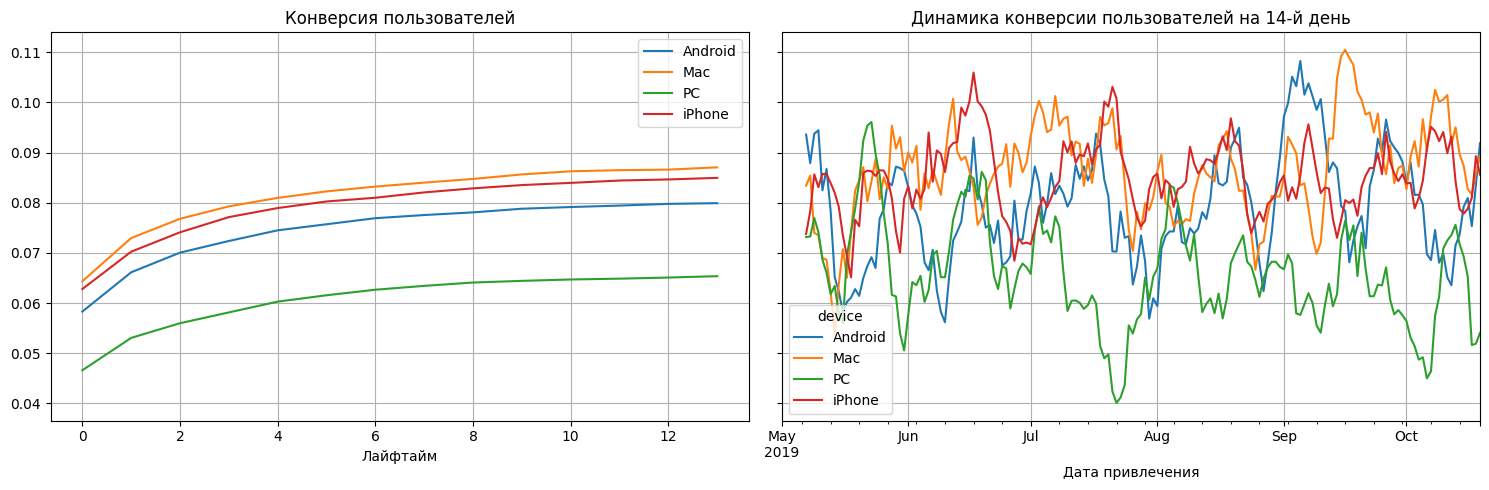

In [64]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    non_org_profiles, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Вывод: ниже всего конверсия у пользователей устройств: PC и Android

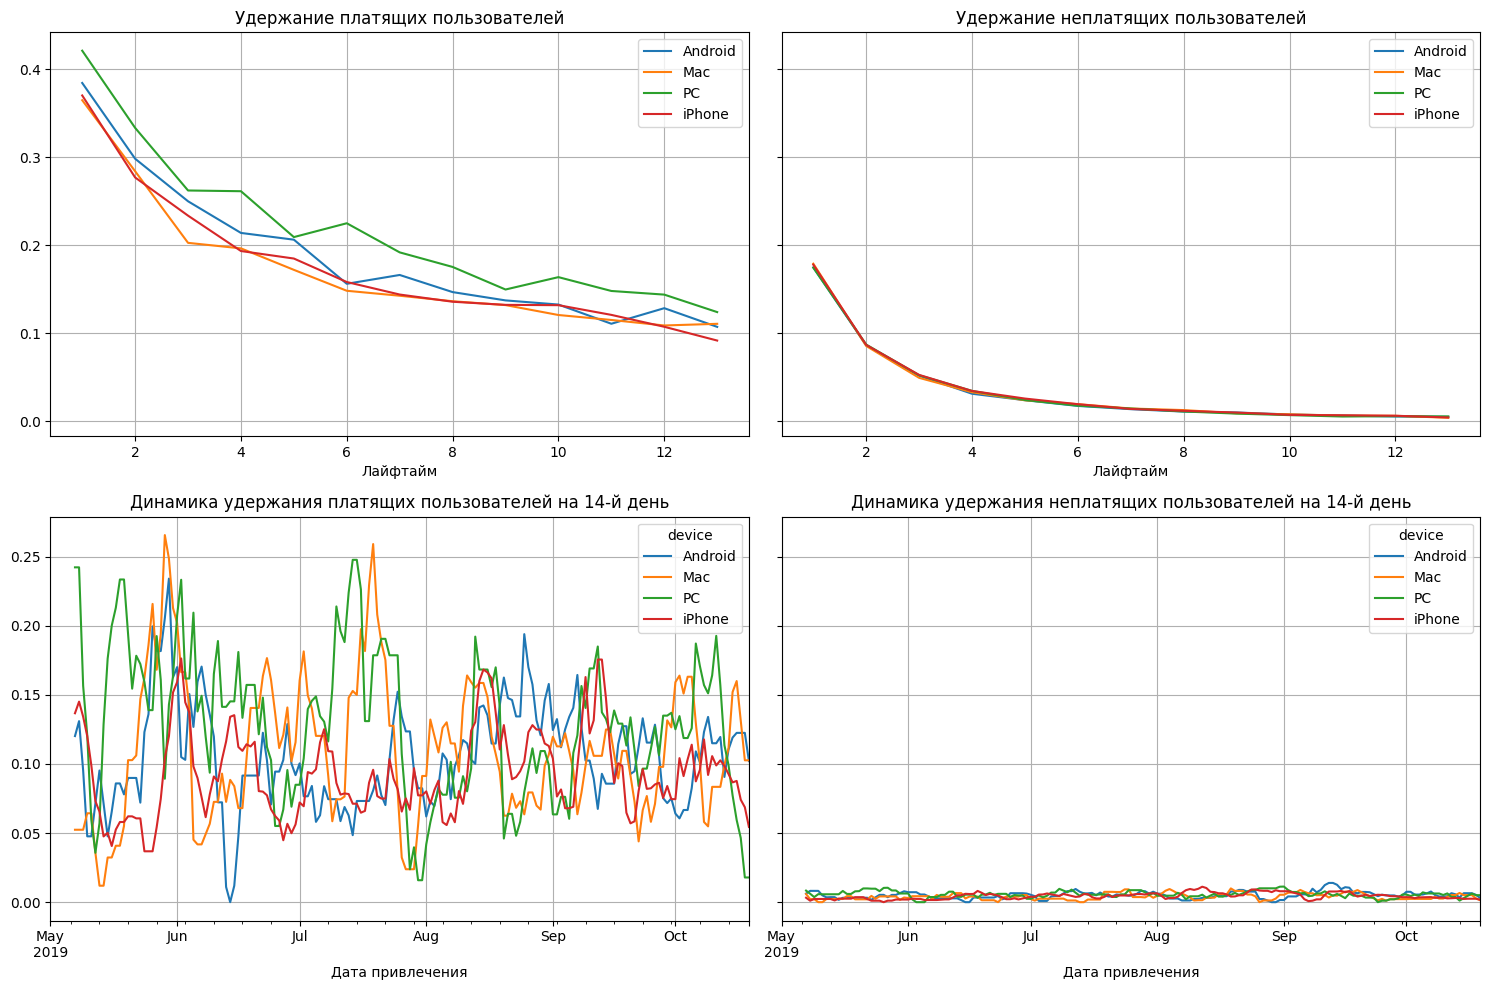

In [65]:
# применим функции get_retention() и plot_retention().
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    non_org_profiles, visits_info, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод: Удержание пользователей (платящих и неплатящих) у всех устройств имеет тренд на явный спад. Пользователи из США (платящие и неплатящие) удерживатся хуже всего.

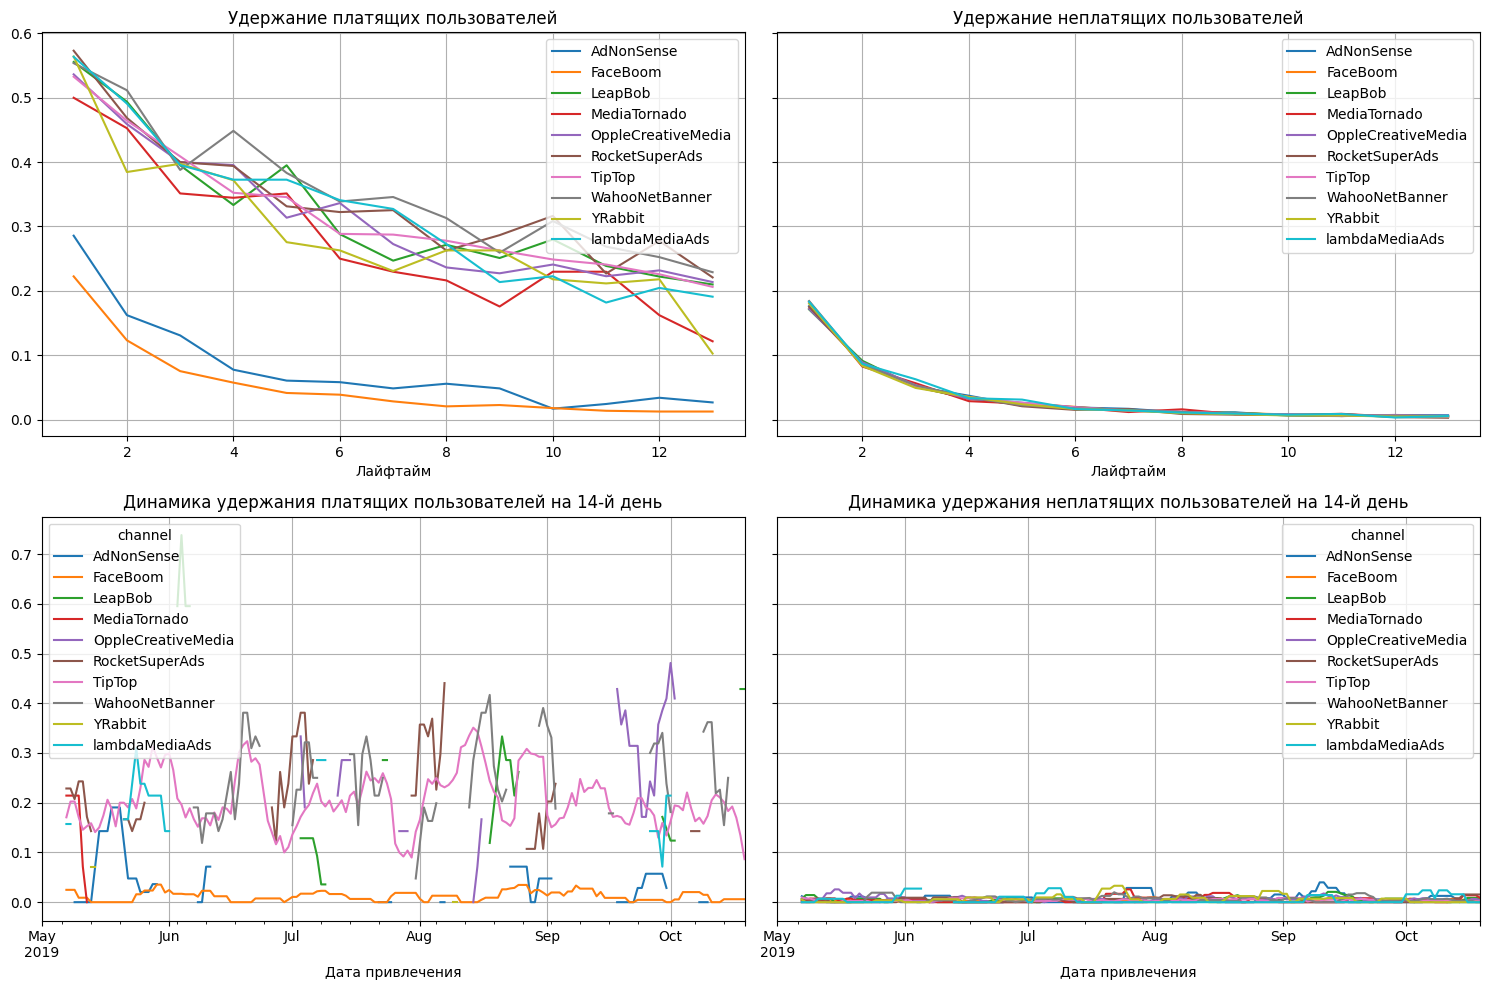

In [66]:
# применим функции get_retention() и plot_retention(). 
# смотрим удержание с разбивкой по каналам привлечения
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    non_org_profiles, visits_info, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод: хуже всего удержание у FaceBoom и AdNonSense

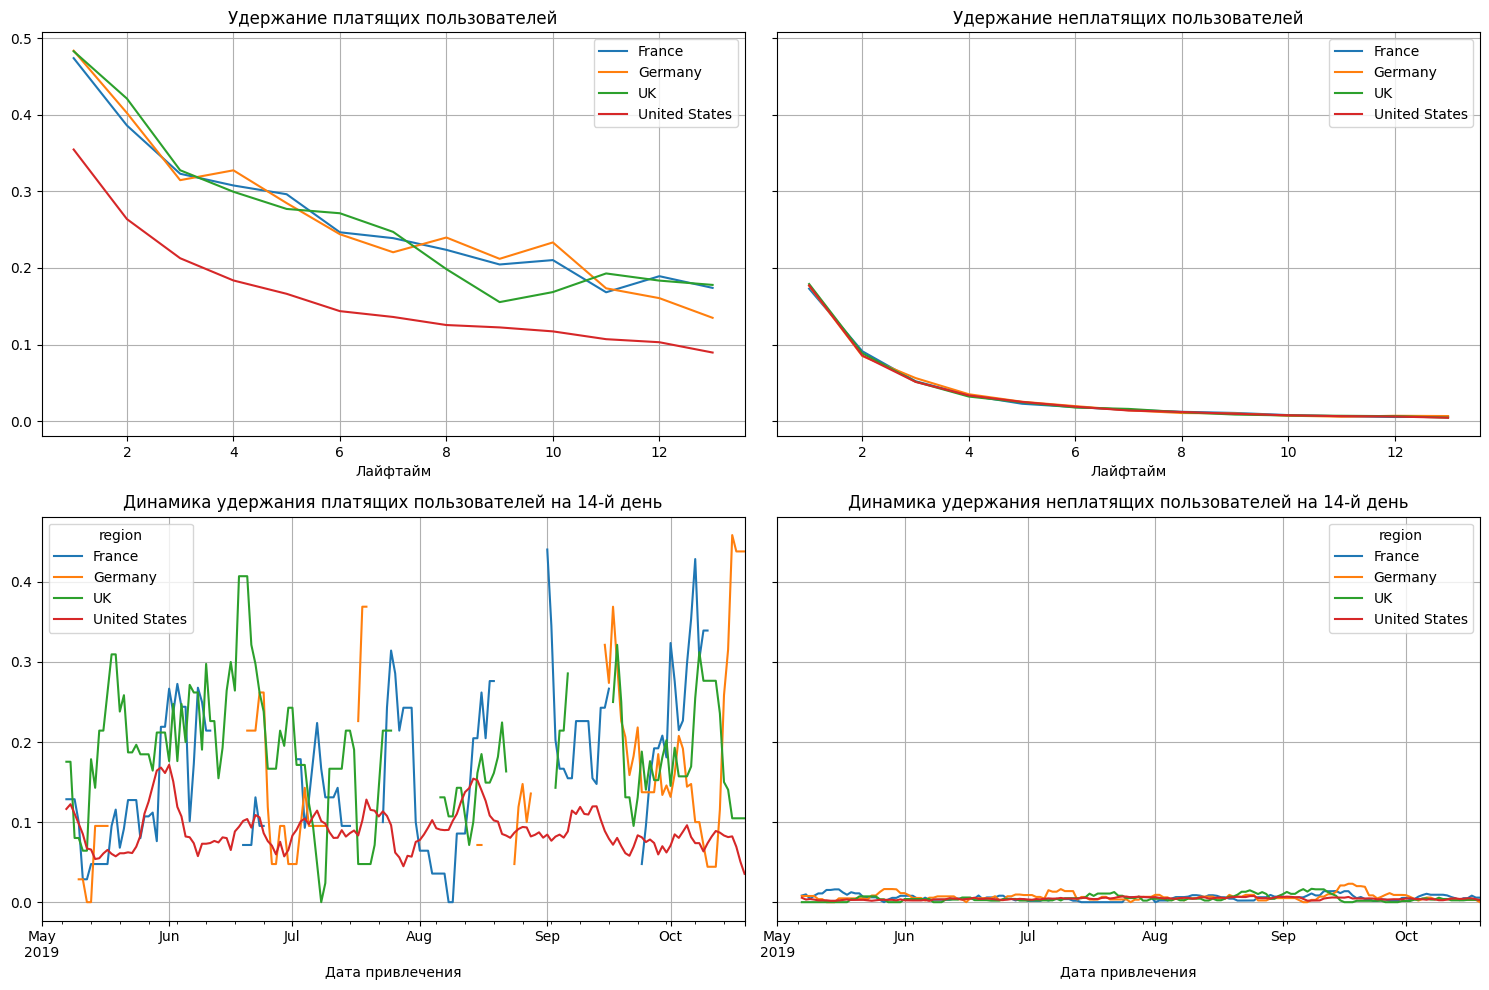

In [67]:
# применим функции get_retention() и plot_retention(). 
# смотрим удержание с разбивкой по регионам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    non_org_profiles, visits_info, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод: хуже всего удержание платящих пользователей из США

In [68]:
#уйдем от "научной нотации" для отображения числовых значений
pd.options.display.float_format = '{:.3f}'.format 

In [69]:
#ищем причины низкой окупаемости рекламы
#уже установили, что США оказывает наибольшее влияние (логично, ибо самый большой рынок среди всех 4х стран)
# создадим вспомогательный датасет исключительно по США
USA_loc = pd.pivot_table(visits_info.loc[(visits_info['region'] == 'United States') & (visits_info['channel'] != 'organic')],
               index = ['device'],
               columns=['channel'],
               values = ['region'],
               aggfunc = 'count').sort_values(by = 'device', ascending = False).style.background_gradient(axis=None)
display(USA_loc)

Вывод: на территории США, в основном, используются устройства Mac, iPhone + каналы FaceBoom и  TipTop. 

<div style="border:solid green 2px; padding: 20px">

Общий вывод по шагу 5:  
    
Вопрос: Окупается ли реклама, направленная на привлечение пользователей в целом?
    
Ответ: нет, реклама не окупается (в целом по рекламной компании ROI = 0.8. Лучше ситуация, если смотреть отдельно в разрезе региона или типа устройства). При этом установлено, что следующие каналы привлечения пользователей нуждаются в оптимизации рекламной компании:
- FaceBoom (низкое удержание)
- AdNonSense  (низкое удержание)
- TipTop (наиболее существенная динамика стоимости привлечения пользователей при этом удержание "среднее", то есть денег тратится много, а результат по удержанию пользователя как у среднего канала с более низкими вложениями)
    
Вопрос: Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    
Ответ: Определено, что оказывать негативное влияние на окупаемость рекламы могут пользователи:
- из США (низкое удержание и больше всего каналов привлечения; перестали окупаться с июня, при этом затраты на привлечение пользователей именно из этого региона резго возрасли);
- устройств: PC и Android (ниже всего конверсия).
    
Вопрос: Чем могут быть вызваны проблемы окупаемости?
    
Ответ: 
- что-то явно произошло в США в июне 2019 года;
- технические неполадки у пользователей Mac, iPhone из-за чего реклама не срабатывает должным образом не территории США;
- не оптимизированная/не адаптированная под США реклама (все же Европа и СШа разные регионы, что влечет разные ценности у пользователей, разный уровень дохода и возможностей);

#### Напишите выводы

<div style="border:solid green 2px; padding: 20px">
    
Вопрос: Выделите причины неэффективности привлечения пользователей.

Ответ: 
- Возможная неадаптированная рекламная компания под жителей США/технические недочеты;
- устарелая рекламная компания (привлечены медийные личности, которые в июне 2019 года дискредитировали себя чем-то);
    
Вопрос: Сформулируйте рекомендации для отдела маркетинга.

Ответ:
- перераспределить/оптимизировать маркетинговый бюджет между каналами на территории США (наименее окупаются каналы: TipTop, FaceBoom) и на территории Европы (AdNonSense);
- возможно имеет смысл изучить "опыт/модель" канала lambdaMediaAds (наиболее значимые LTV и динамика LTV);
- обратить внимание на европейский рынок (AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner, lambdaMediaAds);
- имеет смысл посмотреть внимательнее источник перехода organic (имеет высокий уровень revenue, с учетом того, что данный источник совершенно бесплатный);
- проверить нет ли технических ошибок, которые позволяют полноценно открывать рекламу на устройствах PC, Andriod на территории США.